In [1]:
# Importing relevalnt libraries
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.set()

# Breif Description on the companies


**Nasper (NPN.JO) - Is a global internet group and one of the largest technology investors in the world.

**BHP (BHP.JO) - Is a world-leading resources company. They extract and process minerals, oil and gas.

**COMPAGNIE FINANCIERE RICHEMONT SA (CFR.JO) - Richemont is the owner of prestigious Maisons, recognised for their excellence in jewellery, watches, fashion and accessories, and distinguished by their craftsmanship and creativity.



In [2]:
#Creating a list of the ticker of the companies to extract data from yahoo finance
ticker = ['NPN.JO', 'BHP.JO', 'CFR.JO']
#Creating and empty Data Frame for the data to be imported
finance_data = pd.DataFrame()
finance_data[ticker] = wb.DataReader(ticker, data_source ='yahoo', start = '2020-1-1')['Adj Close']

In [3]:
print(finance_data.head())
print(finance_data.tail())

                   NPN.JO        BHP.JO        CFR.JO
Date                                                 
2020-01-02  233323.796875  32215.134766  11133.775391
2020-01-03  234970.796875  32201.609375  10988.989258
2020-01-06  233952.656250  32163.929688  10822.534180
2020-01-07  235380.046875  32226.726562  11042.175781
2020-01-08  232076.078125  32391.927734  11069.753906
              NPN.JO   BHP.JO   CFR.JO
Date                                  
2021-07-23  296053.0  45930.0  18678.0
2021-07-26  274801.0  47500.0  18943.0
2021-07-27  254662.0  47594.0  18585.0
2021-07-28  274744.0  47778.0  18771.0
2021-07-29  285953.0  48421.0  18760.0


In [4]:
NPN = pd.DataFrame(finance_data['NPN.JO'])
BHP = pd.DataFrame(finance_data['BHP.JO'])
CFR = pd.DataFrame(finance_data['CFR.JO'])

# Line graph to how the trend of the stock prices

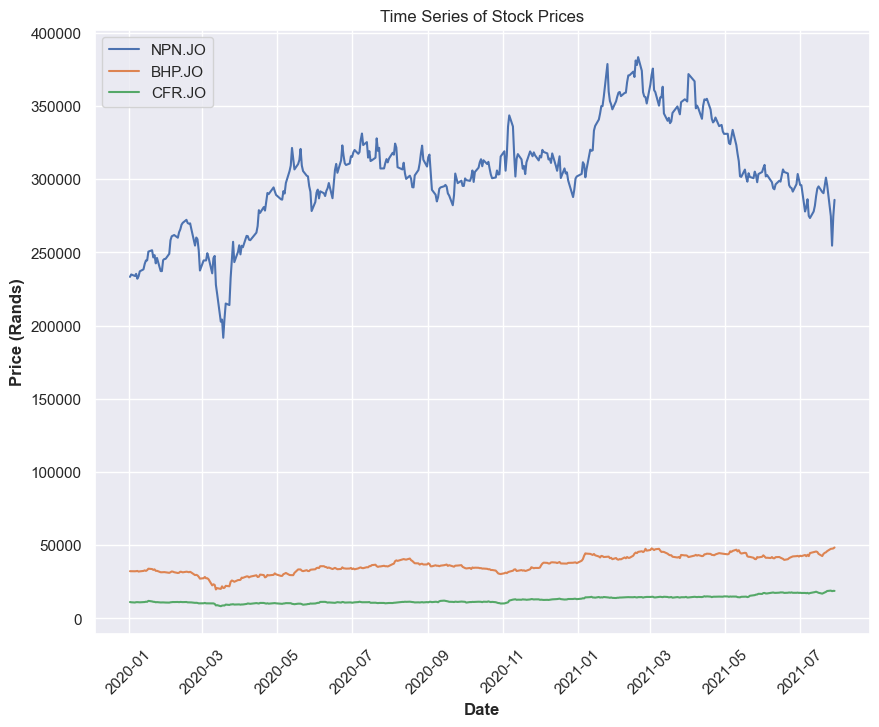

In [49]:
pd.to_datetime(NPN.index)
labels = ['NPN.JO', 'BHP.JO', 'CFR.JO']
plt.plot(NPN.index, NPN['NPN.JO'])
plt.plot(NPN.index, BHP['BHP.JO'])
plt.plot(NPN.index, CFR['CFR.JO'])
plt.title('Time Series of Stock Prices')
plt.ylabel('Price (Rands)', fontweight = 'bold')
plt.xlabel('Date', fontweight = 'bold')
plt.legend(loc = 'upper left', labels = labels)
plt.xticks(rotation = 45)
plt.show()

In [37]:
#Creating variables for the statistics to be use
log_returns_npn = np.log(1 + NPN.pct_change())
log_returns_bhp = np.log(1 + BHP.pct_change())
log_returns_cfr = np.log(1 + CFR.pct_change())

mean_npn = log_returns_npn.mean()
mean_bhp = log_returns_bhp.mean()
mean_cfr = log_returns_cfr.mean()

var_npn = log_returns_npn.var()
var_bhp = log_returns_bhp.var()
var_cfr = log_returns_cfr.var()

drift_npn = mean_npn - (0.5 *var_npn)
drift_bhp = mean_bhp - (0.5 *var_bhp)
drift_cfr = mean_cfr - (0.5 *var_cfr)

stdev_npn = log_returns_npn.std()
stdev_bhp = log_returns_bhp.std()
stdev_cfr = log_returns_cfr.std()

#Determing the number of intervals and iterations 
t_intervals = 250
n_iterations = 15

#
daily_returns_npn = np.exp(drift_npn.values + stdev_npn.values * norm.ppf(np.random.rand(t_intervals, n_iterations)))
daily_returns_bhp = np.exp(drift_bhp.values + stdev_bhp.values * norm.ppf(np.random.rand(t_intervals, n_iterations)))
daily_returns_cfr = np.exp(drift_cfr.values + stdev_cfr.values * norm.ppf(np.random.rand(t_intervals, n_iterations)))

In [38]:
#Creating variables for the last adjusted prices for each stock
p_npn = NPN.iloc[-1]
p_bhp = BHP.iloc[-1]
p_cfr = CFR.iloc[-1]

print(p_npn)
print(p_bhp)
print(p_cfr)

NPN.JO    285953.0
Name: 2021-07-29 00:00:00, dtype: float64
BHP.JO    48421.0
Name: 2021-07-29 00:00:00, dtype: float64
CFR.JO    18760.0
Name: 2021-07-29 00:00:00, dtype: float64


# Creating variable of price list for each stock

In [39]:
price_list_npn = np.zeros_like(daily_returns_npn)
price_list_bhp = np.zeros_like(daily_returns_bhp)
price_list_cfr = np.zeros_like(daily_returns_cfr)

In [40]:
print(price_list_npn)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
#Now the first row will be set with the lastest
price_list_npn[0] = p_npn
price_list_bhp[0] = p_bhp
price_list_cfr[0] = p_cfr

In [42]:
print(price_list_npn)
print(price_list_bhp)
print(price_list_cfr)

[[285953. 285953. 285953. ... 285953. 285953. 285953.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]]
[[48421. 48421. 48421. ... 48421. 48421. 48421.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]
[[18760. 18760. 18760. ... 18760. 18760. 18760.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]


# Creating loops to run through the simulations

In [43]:
#Iterating for Naspers
for t in range(1, t_intervals):
    price_list_npn[t] = price_list_npn[t-1] * daily_returns_npn[t]
    
print(price_list_npn)

[[285953.         285953.         285953.         ... 285953.
  285953.         285953.        ]
 [289375.27490356 283908.97349475 294378.04937155 ... 276844.69737632
  284646.41653688 281761.51641572]
 [287184.16586755 280464.00664183 299047.7075999  ... 279520.4141312
  281873.38981165 284720.09943168]
 ...
 [364140.11545553 241722.82757923 298204.31272947 ... 233392.35661278
  198085.5026886  176649.55209123]
 [368823.56275527 246544.02926447 292280.87812002 ... 228192.57112525
  201940.44750153 177114.71123519]
 [362922.48813973 263205.23407246 291875.99277207 ... 228328.29390782
  201898.64958773 174621.33337866]]


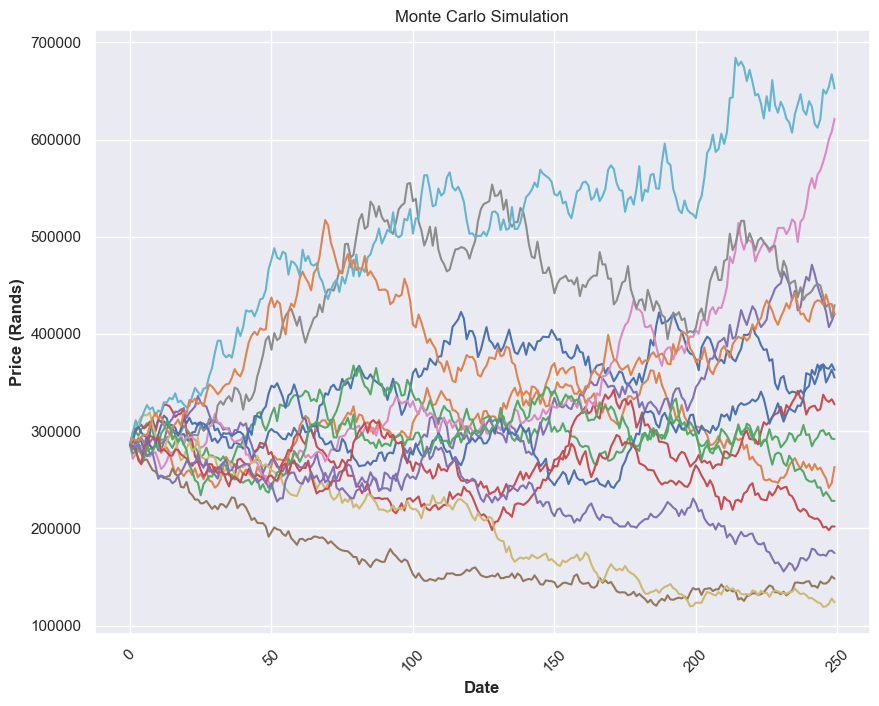

In [50]:
#NPN
plt.plot(price_list_npn)
plt.title('Monte Carlo Simulation')
plt.ylabel('Price (Rands)', fontweight = 'bold')
plt.xlabel('Date', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

In [45]:
#Iterating for BHP
for t in range(1, t_intervals):
    price_list_bhp[t] = price_list_bhp[t-1] * daily_returns_bhp[t]
    
print(price_list_bhp)

[[ 48421.          48421.          48421.         ...  48421.
   48421.          48421.        ]
 [ 47811.94293702  47211.64555681  48974.2837457  ...  47937.22318224
   47267.83352006  47396.99096779]
 [ 47179.45937876  49051.86637733  48742.10725406 ...  46471.04096058
   45627.79361436  46632.49528762]
 ...
 [ 73922.40611007  50122.69717248 128934.18864101 ...  42307.32615212
   44986.43639295 118543.92442859]
 [ 74098.22899793  51233.54799219 129107.46625659 ...  42780.5539512
   45465.94766213 124290.18446568]
 [ 73142.48782002  48443.95109998 130427.95475612 ...  42773.15617187
   46045.91082437 123146.68575012]]


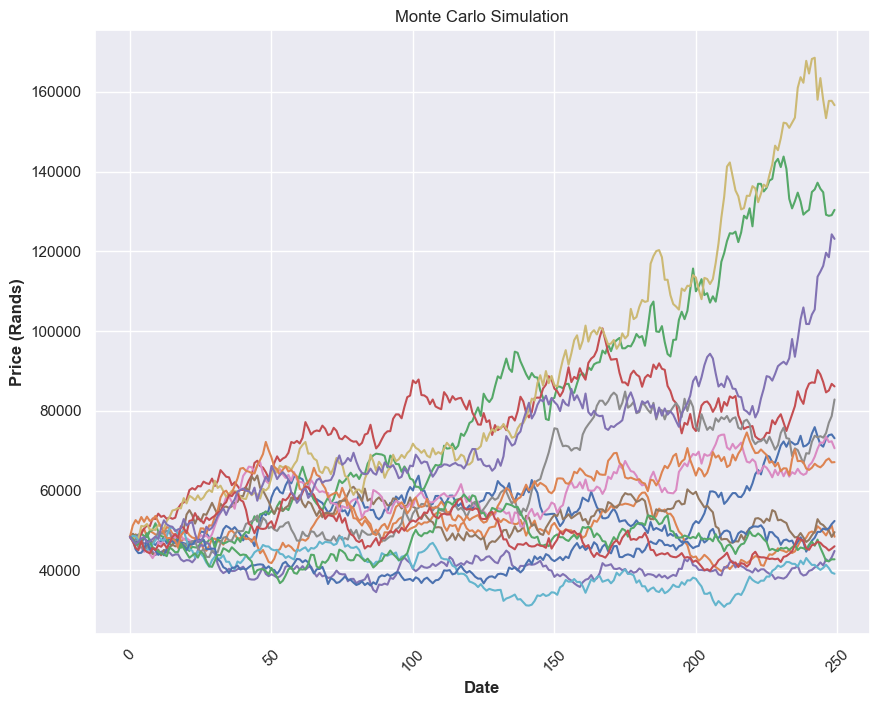

<Figure size 2000x800 with 0 Axes>

In [46]:
#BHP
plt.plot(price_list_bhp)
plt.title('Monte Carlo Simulation')
plt.ylabel('Price (Rands)', fontweight = 'bold')
plt.xlabel('Date', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.figure(figsize = (20,8))
plt.show()

In [47]:
#Iterating for CFR
for t in range(1, t_intervals):
    price_list_cfr[t] = price_list_cfr[t-1] * daily_returns_cfr[t]
    
print(price_list_cfr)

[[18760.         18760.         18760.         ... 18760.
  18760.         18760.        ]
 [18495.65886044 18379.24518504 18825.61799388 ... 19256.53744288
  18343.97409509 18782.56516689]
 [18573.13836205 19230.13372588 19568.39460014 ... 19470.30799016
  17783.26216154 19349.69006714]
 ...
 [21549.47589723 30747.97285772 11906.07650763 ... 29235.08886916
  17758.33948346 20383.72096449]
 [20232.51686351 29708.94514243 12039.69239778 ... 29250.67525336
  18027.32318495 20246.57464474]
 [20600.74755561 29564.091072   12152.95334649 ... 29522.82319893
  18305.30557262 20819.24374181]]


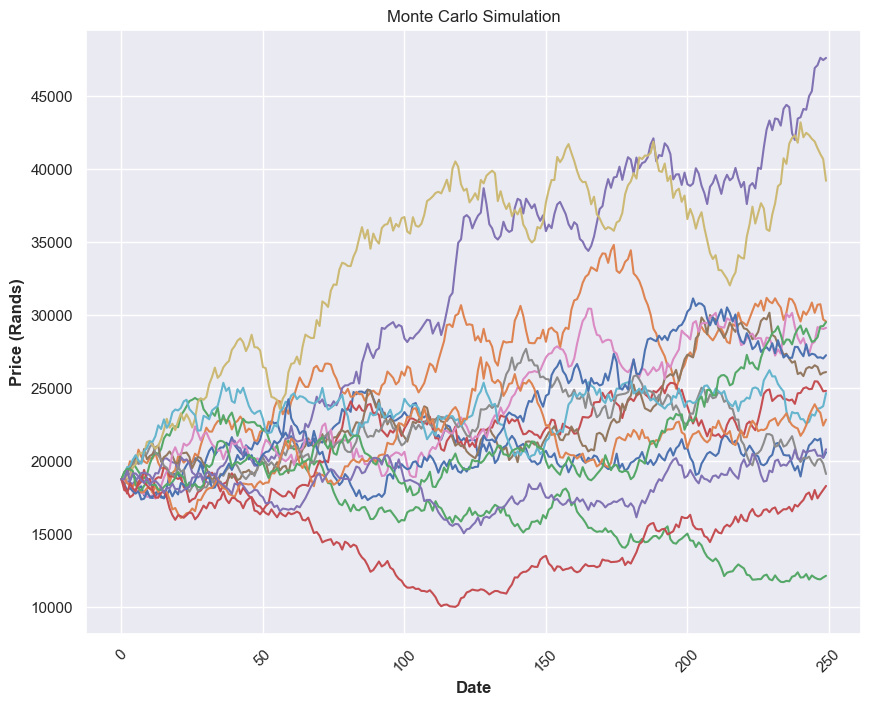

In [51]:
#CFR
plt.plot(price_list_cfr)
plt.title('Monte Carlo Simulation')
plt.ylabel('Price (Rands)', fontweight = 'bold')
plt.xlabel('Date', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()